In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.patches import Polygon

from astropy.table import Table

Exercise: Think about the following questions:

What is the primary scientific result of this work?  
What story is this figure telling?  
In the design of this figure, can you identify 1-2 choices the authors made that you think are effective? Think about big-picture elements, like the number of panels and how they are arranged, as well as details like the choice of typeface.  
Can you identify 1-2 elements that could be improved, or that you might have done differently?

![](lesson_7.png)

In [2]:
ls -ltr

total 46736
-rw-r--r--  1 bostroem  staff     36820 Nov 16 18:00 Lesson 1.ipynb
-rw-r--r--  1 bostroem  staff     39771 Nov 16 20:11 Lesson_2.ipynb
-rw-r--r--  1 bostroem  staff  17336016 Nov 16 20:29 gd1_dataframe.hdf5
-rw-r--r--  1 bostroem  staff    586396 Nov 18 09:51 Lesson_3.ipynb
-rw-r--r--  1 bostroem  staff     28411 Nov 19 09:28 Lesson_5.ipynb
-rw-r--r--  1 bostroem  staff    773272 Nov 19 10:14 gd1_candidates.hdf5
-rw-r--r--  1 bostroem  staff    773272 Nov 19 10:15 inclass
-rw-r--r--  1 bostroem  staff    404530 Nov 19 10:24 candidate_df.xml
-rw-r--r--  1 bostroem  staff    332248 Nov 19 11:26 external.xml
-rw-r--r--  1 bostroem  staff     97920 Nov 19 12:08 gd1_photo.fits
-rw-r--r--  1 bostroem  staff     53548 Nov 19 12:26 Lesson5_inclass.ipynb
-rw-r--r--  1 bostroem  staff     14825 Nov 19 15:13 Lesson_6.ipynb
-rw-r--r--  1 bostroem  staff   2092256 Nov 19 21:07 gd1_merged.hdf5
-rw-r--r--  1 bostroem  staff      7400 Nov 19 21:18 gd1_polygon.hdf5
-rw-r--r--@ 1 bostroem  

# Plotting Functions

### Upper left

In [3]:
def plot_first_selection(df):
    """Plot spatial distribution of stars selected based on Proper Motion
    
    df: Tale or DataFrame with proper motion selected coordinates in GD-1 reference frame
    """
    x = df['phi1']
    y = df['phi2']

    plt.plot(x, y, 'ko', markersize=0.3, alpha=0.3)

    plt.xlabel('$\phi_1$ [deg]')
    plt.ylabel('$\phi_2$ [deg]')
    plt.title('Proper motion selection', fontsize='medium')

    plt.axis('equal')

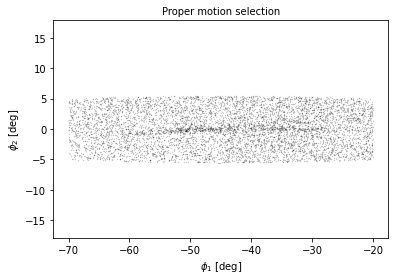

In [4]:
filename_pm_selected = 'gd1_candidates.hdf5'
candidate_df = pd.read_hdf(filename_pm_selected, 'candidate_df')
plot_first_selection(candidate_df)

### Upper right

In [5]:
def plot_proper_motion(df):
    """Plot proper motion of spatially selected stars in GD-1
    
    df: Table or DataFrame with spatially selected proper motions in GD-1 reference frame
    """
    pm1 = df['pm_phi1']
    pm2 = df['pm_phi2']

    plt.plot(pm1, pm2, 'ko', markersize=0.3, alpha=0.3)
    
    poly = Polygon(vertices, closed=True, 
                   facecolor='C1', alpha=0.4)
    plt.gca().add_patch(poly)
    
    plt.xlabel('$\mu_{\phi_1} [\mathrm{mas~yr}^{-1}]$')
    plt.ylabel('$\mu_{\phi_2} [\mathrm{mas~yr}^{-1}]$')

    plt.xlim(-12, 8)
    plt.ylim(-10, 10)

In [6]:
pm1_min = -8.9
pm1_max = -6.9
pm2_min = -2.2
pm2_max =  1.0

pm1_rect = [pm1_min, pm1_min, pm1_max, pm1_max]
pm2_rect = [pm2_min, pm2_max, pm2_max, pm2_min]

In [7]:
vertices = np.transpose([pm1_rect, pm2_rect])

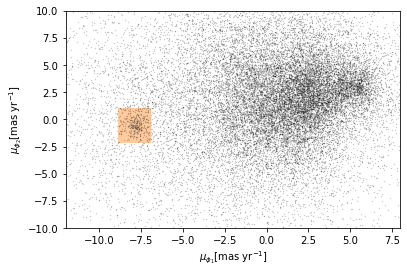

In [8]:
filename_pm = 'gd1_dataframe.hdf5'
centerline = pd.read_hdf(filename_pm, 'centerline')
plot_proper_motion(centerline)

### Lower left

In [9]:
def plot_second_selection(df):
    """Plot spatial distribution of photometry selected points
    
    df: Table or DataFrame with photometry selected positions in GD1 reference frame
    """
    x = df['phi1']
    y = df['phi2']

    plt.plot(x, y, 'ko', markersize=0.7, alpha=0.9)

    plt.xlabel('$\phi_1$ [deg]')
    plt.ylabel('$\phi_2$ [deg]')
    plt.title('Proper motion + photometry selection', fontsize='medium')

    plt.axis('equal')

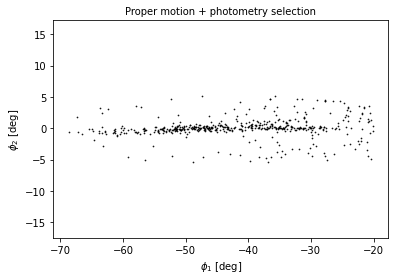

In [10]:
filename = 'gd1_merged.hdf5'
selected = pd.read_hdf(filename, 'selected')
plot_second_selection(selected)

### Lower right

In [11]:
def plot_cmd(table):
    """Plot a color magnitude diagram.
    
    table: Table or DataFrame with photometry data
    """
    y = table['g_mean_psf_mag']
    x = table['g_mean_psf_mag'] - table['i_mean_psf_mag']

    plt.plot(x, y, 'ko', markersize=0.3, alpha=0.3)

    plt.xlim([0, 1.5])
    plt.ylim([14, 22])
    plt.gca().invert_yaxis()

    plt.ylabel('$g_0$')
    plt.xlabel('$(g-i)_0$')

In [12]:
filename_poly = 'gd1_polygon.hdf5'
coords_df = pd.read_hdf(filename_poly, 'coords_df')
coords = coords_df.to_numpy()

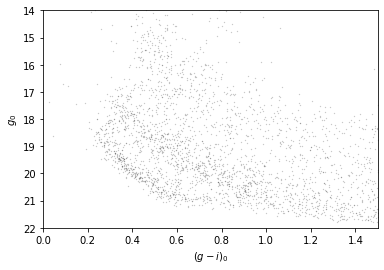

In [13]:
merged = pd.read_hdf(filename, 'merged')
plot_cmd(merged)

# Putting it all together

Many ways to create multiple panels:
* subplot
* subplots
* **subplot2grid**
* add_subplot
* axes
* add_axes

#### Equal sized panels:

ax = subplot2grid((nrows, ncols), (row, col), rowspan, colspan)

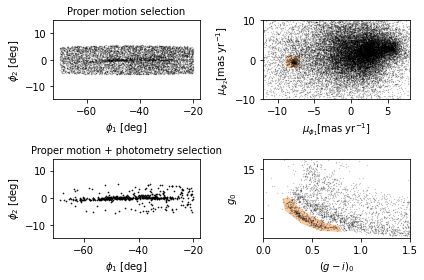

In [14]:
shape = (2, 2)
plt.subplot2grid(shape, (0, 0))
plot_first_selection(candidate_df)

plt.subplot2grid(shape, (0, 1))
plot_proper_motion(centerline)

plt.subplot2grid(shape, (1, 0))
plot_second_selection(selected)

plt.subplot2grid(shape, (1, 1))
plot_cmd(merged)
poly = Polygon(coords, closed=True, 
               facecolor='C1', alpha=0.4)

plt.gca().add_patch(poly)

plt.tight_layout()

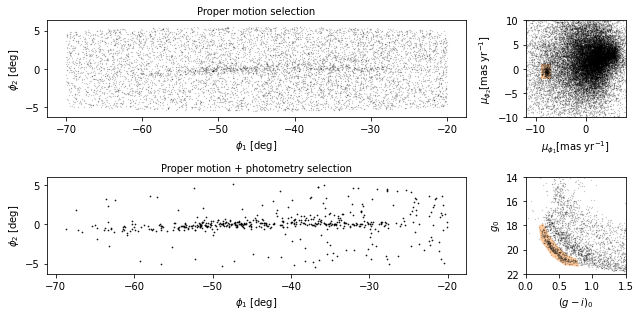

In [15]:
plt.figure(figsize=(9, 4.5)) #Set figure size

shape = (2, 4) #change shape
plt.subplot2grid(shape, (0, 0), colspan=3) #add colspan
plot_first_selection(candidate_df)

plt.subplot2grid(shape, (0, 3))
plot_proper_motion(centerline)

plt.subplot2grid(shape, (1, 0), colspan=3)
plot_second_selection(selected)

plt.subplot2grid(shape, (1, 3))
plot_cmd(merged)
poly = Polygon(coords, closed=True, 
               facecolor='C1', alpha=0.4)
plt.gca().add_patch(poly)

plt.tight_layout()

## Annotations

**Exercise** choose any or all of these features and add them to the figure:

To draw vertical lines, see plt.vlines and plt.axvline.  
To add text, see plt.text.  
To add an annotation with text and an arrow, see plt.annotate.  

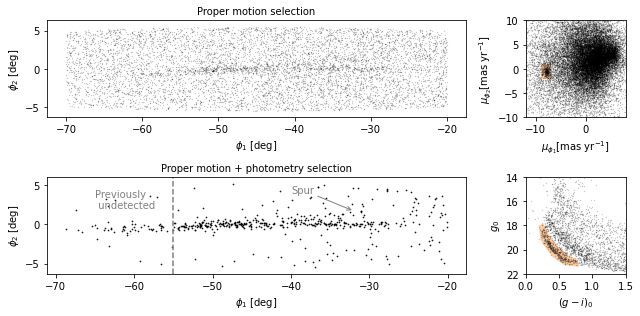

In [28]:
plt.figure(figsize=(9, 4.5)) #Set figure size

shape = (2, 4) #change shape
plt.subplot2grid(shape, (0, 0), colspan=3) #add colspan
plot_first_selection(candidate_df)

plt.subplot2grid(shape, (0, 3))
plot_proper_motion(centerline)

plt.subplot2grid(shape, (1, 0), colspan=3)
plot_second_selection(selected)
plt.axvline(-55, color='gray', ls='--')
plt.text(-65, 2, 'Previously\n undetected', color='gray')
plt.annotate('Spur', 
             xy=(-32, 1.7), 
             xytext=(-40, 4), 
             arrowprops={'arrowstyle':'->',
                        'color':'gray'},
            color='gray')

plt.subplot2grid(shape, (1, 3))
plot_cmd(merged)
poly = Polygon(coords, closed=True, 
               facecolor='C1', alpha=0.4)
plt.gca().add_patch(poly)

plt.tight_layout()

# Levels of Customization

### One time use, single figure:

axis and figure objects have individual properties

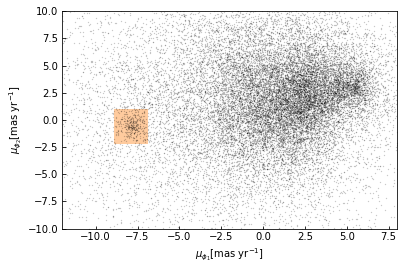

In [16]:
plot_proper_motion(centerline)
ax = plt.gca()
ax.tick_params(direction='in')

### All figures in a notebook or script: rcParams

In [17]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

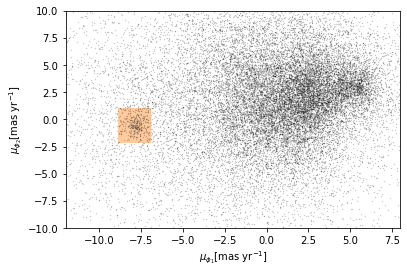

In [18]:
plt.rcParams['font.size']
plot_proper_motion(centerline)

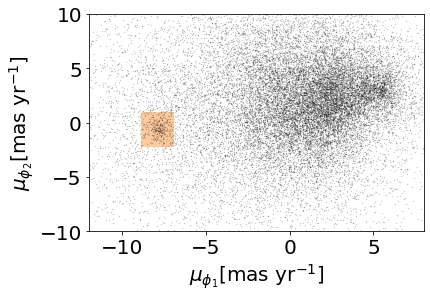

In [19]:
plt.rcParams['font.size'] = 20
plot_proper_motion(centerline)

**Exercise**: Plot the previous figure again, and see what font sizes have changed. Look up any other element of rcParams, change its value, and check the effect on the figure.

### Making changes permanent

add to matplotlibrc file  
read when matplotlib is imported

### Having Multiple defaults: style sheets

In [20]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'az-paper-onecol',
 'az-paper-twocol',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

style sheets affect everything after you set it

In [21]:
plt.style.use('fivethirtyeight')

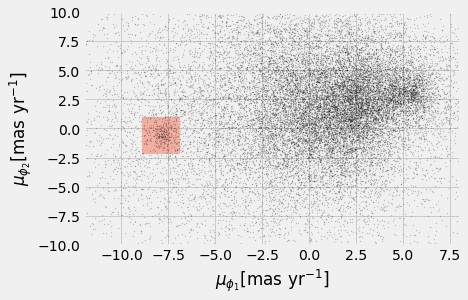

In [22]:
plot_proper_motion(centerline)

In [23]:
import os
from wget import download

filename = 'az-paper-twocol.mplstyle'
path = 'https://github.com/AllenDowney/AstronomicalData/raw/main/'

if not os.path.exists(filename):
    print(download(path+filename))

### Accessing your new style

In [24]:
import matplotlib as mpl

mpl.get_configdir()

'/Users/bostroem/.matplotlib'

In [25]:
#Make it accessible from anywhere
!cp az-paper-twocol.mplstyle /Users/bostroem/.matplotlib/stylelib/

SyntaxError: invalid syntax (<ipython-input-25-c0eea4612510>, line 2)

alternately, for a single directory, you could store it locally

In [ ]:
plt.style.use('./az-paper-twocol.mplstyle')